# Determining the effect of data design strategies on predicting 2-D financial time series using convolutional neural networks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.formula.api as smf
from bokeh.plotting import figure, show
import os
import tensorflow as tf
import numpy as np
import time 
from datetime import timedelta
import os
import stockstats
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar');
import FinanceLab as finlab
import scipy 
import statistics as stat 
import stockstats
from functools import wraps
from pandas import DataFrame, Series
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from bokeh.plotting import figure, show
import tensorflow as tf
import time 
from datetime import timedelta
import os
os.chdir(path=r'C:\Users\LenovoE73\Desktop\data')
#import FinanceLab as finlab
import scipy 
import statistics as stat 
import stockstats
import researchpy as rp
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# confusion_matrix_returns function

In [3]:
def confusion_matrix_returns(y_test_f,predicted_class1_f):
    cm_tam_yeni = confusion_matrix(list(y_test_f), list(predicted_class1_f)).ravel()
    cm_tam_yeni_len =len(cm_tam_yeni)
    root= int(pow(cm_tam_yeni_len, 0.5))
    confusion_matrix_m = cm_tam_yeni.reshape(root,root)
    FP = confusion_matrix_m.sum(axis=0) - np.diag(confusion_matrix_m)  
    FN = confusion_matrix_m.sum(axis=1) - np.diag(confusion_matrix_m)
    TP = np.diag(confusion_matrix_m)
    TN = confusion_matrix_m.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)


    f1_score =(2*(PPV * TPR))/(PPV + TPR)


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    accuracy = ACC.mean()
    Precision = PPV.mean()
    Sensitivity = TPR.mean()
    Specificity = TNR.mean()
    f1_score =(2*(Precision * Sensitivity))/(Precision + Sensitivity)
    
    print("Accuracy: " , accuracy)
    print("Precision: " , PPV.mean())
    print("Sensitivity: " , TPR.mean())
    print("Specificity: " , TNR.mean())
    print("F1_Score: " , f1_score.mean())
    return accuracy,Precision, Sensitivity, Specificity, f1_score

In [4]:
confusion_matrix(list(y_test),list(predicted_class1))

NameError: name 'y_test' is not defined

# come_back = 100

In [3]:
i = 0
j = 0

come_back = 100

kazanc_tuzak = ""

feature_list=['DI+','DI-','MFI','MFI_EMA_9','RSI','RSI_EMA_9','EMA9_EMA50_dist_sign'
              ,'EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist',
              'EMA50_EMA200_dist_sign','EMA50_EMA200_dist','Reverse_Row','date','EMA_9','EMA_50','EMA_200']

stock_code_adi=''
post_fix =".xlsx"
file = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/hisseler_Kopya.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.
# Convolutional işlemi için dosyaya yazdırma işlemleri yapılıyor. Getiri ve Tuzak matrisleri kaydediliyor.
dataset_2 = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/return_ratio/dataset_2.txt","r")

for line in dataset_2: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(line,end = "") # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    if line.find("Kazanc")>-1:
        kazanc_tuzak = "Kazanc"
    else:
        kazanc_tuzak = "Tuzak"    
    index = line.rfind(kazanc_tuzak)
    stock_code =line[6:index-1]
    stock_code =stock_code.strip()
    stock_code_adi = stock_code + post_fix
    Reverse_Row_finish_int = line.rfind("Reverse_Row_finish")
    kar_durumu = line[index+7:Reverse_Row_finish_int-1]
    print(kazanc_tuzak + "\n")
    print(stock_code + "\n")
    print(kar_durumu + "\n")
    counter_back_int    =  line.rfind("counter_back")
    counter_back_string = line[Reverse_Row_finish_int+7:Reverse_Row_finish_int-1]
    line = line[Reverse_Row_finish_int+19:]
    comma_int = line.rfind(",")
    counter_back = line[:comma_int]
    print(counter_back+ "\n")
    line = line[comma_int+14:]
    print(line)

    #Excellerin alınacağı Path e geldik
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\hisse_datalar_xls')

    xl = pd.ExcelFile(stock_code_adi)

    # Print the sheet names
    #print(xl.sheet_names)

    # Load a sheet into a DataFrame by name: df1
    hisse = xl.parse(stock_code)
    hisse = hisse.iloc[int(counter_back)-come_back :int(counter_back)]
    hisse = hisse[feature_list]
    name=stock_code

    if kazanc_tuzak == "Kazanc":
        i = i + 1
        os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100');
        hisse.to_excel(name + str(i) + "_Kazanc.xlsx",sheet_name= name + str(i) + "_Kazanc.xlsx")
    else:
        j = j + 1
        os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100');
        hisse.to_excel(name + str(j) + "_Tuzak.xlsx",sheet_name= name + str(j) + "_Tuzak.xlsx")

print("işlemler tamam \n")
file.close()
dataset_2.close()
print("Dosyalar kapandı")

Hisse=ADEL,Kazanc=31,Reverse_Row_finish=108,counter_back=83 
Kazanc

ADEL

31

108

83 

Hisse=ADEL,Kazanc=38,Reverse_Row_finish=605,counter_back=30 
Kazanc

ADEL

38

605

30 

Hisse=ADEL,Kazanc=38,Reverse_Row_finish=682,counter_back=26 
Kazanc

ADEL

38

682

26 

Hisse=ADEL,Tuzak=1,Reverse_Row_finish=847,counter_back=80 
Tuzak

ADEL



847

80 

Hisse=ADEL,Tuzak=6,Reverse_Row_finish=931,counter_back=77 
Tuzak

ADEL



931

77 

Hisse=ADEL,Kazanc=27,Reverse_Row_finish=987,counter_back=27 
Kazanc

ADEL

27

987

27 



KeyboardInterrupt: 

# Convolution Neural Networktaki excellerin isimleri alınıyor.
# ve bir dosyaya isimler kaydediliyor

In [ ]:
feature_list=['DI+','DI-','MFI','MFI_EMA_9','RSI','RSI_EMA_9','EMA9_EMA50_dist_sign'
 ,'EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist',
  'EMA50_EMA200_dist_sign','EMA50_EMA200_dist']

feature_list_base = ['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI', 'RSI_MA_14','RSI_EMA_9', 'WR', 
 'PPO_histo', 'PPO', 'PPO_signal', 'CCI', 'CMO','MACD', 'MACD_signal', 'ROC_9', 'CMFI'
,'class_name']




feature_list = feature_list_base


stock_code_adi=''
post_fix =".xlsx"
file = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/convolutional_matrix/data_set_list.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.

#dosyaya dataları tek tek sınıflıyoruz. dosyaya ekleme kipi ile açıyoruz     
for stock_code in file: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(stock_code) # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    stock_code = stock_code.strip()
    hisse_adi =stock_code.strip()
    # illustrate excel files
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100')
    # Load spreadsheet
    xl = pd.ExcelFile(stock_code)
    # Print the sheet names
    #print(xl.sheet_names)
    # Load a sheet into a DataFrame by name: df1
    hisseler = xl.parse(hisse_adi)
    hisseler["EMA9_EMA50_dist"]=hisseler["EMA9_EMA50_dist"]*1000
    hisseler["EMA9_EMA200_dist"]=hisseler["EMA9_EMA200_dist"]*1000
    hisseler["EMA50_EMA200_dist"]=hisseler["EMA50_EMA200_dist"]*1000
    hisseler = hisseler[feature_list]
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100_pre_process');
    hisseler.to_excel(stock_code,sheet_name= stock_code)
    print("hisse kaydedildi\n")
    print(type(hisseler))
    hisse =  hisseler
    hisseler = hisseler.to_numpy()
    print(type(hisseler))
    print(hisseler)
print("------İşlem Tamam------")

# min max scaler fonksiyon ile exceller resim formatına dönüştürülüyor.
# data_set_image isimli dosyaya kaydedilip resim şekline dönüştürülüyor.


In [ ]:
#Tüm hisseler başına döngü değişkenleri
counter =1
exceptional_value =1
total=1

# Hisse başına döngüler
counter_ic_sayac =1
exceptional_value_ic = 1
func_return_EMA_counter = []
func_return_EMA_row  = []
i = 1

feature_list=['DI+','DI-','MFI','MFI_EMA_9','RSI','RSI_EMA_9','EMA9_EMA50_dist_sign'
             ,'EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist',
              'EMA50_EMA200_dist_sign','EMA50_EMA200_dist']


stock_code_adi=''
post_fix =".xlsx"
file = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/convolutional_matrix/data_set_list.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.

#dosyaya dataları tek tek sınıflıyoruz. dosyaya ekleme kipi ile açıyoruz     
for stock_code in file: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(stock_code) # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    stock_code = stock_code.strip()
    hisse_adi =stock_code.strip()
    # illustrate excel files
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100_pre_process')
    # Load spreadsheet
    xl = pd.ExcelFile(stock_code)
    # Print the sheet names
    #print(xl.sheet_names)
    # Load a sheet into a DataFrame by name: df1
    hisse = xl.parse(hisse_adi)
    hisse = hisse[feature_list]
    adx = finlab.MinMaxScaler_Function(hisse)
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100_pre_process_image');
    adx.to_excel(stock_code,sheet_name= stock_code)

print("------İşlem Tamam------")

In [4]:
feature_list=['DI+','DI-','MFI','MFI_EMA_9','RSI','RSI_EMA_9','EMA9_EMA50_dist_sign'
             ,'EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist',
              'EMA50_EMA200_dist_sign','EMA50_EMA200_dist']

os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100_pre_process_image')
hisse_adi = "ADEL4_Tuzak.xlsx"
# Load spreadsheet
xl = pd.ExcelFile(hisse_adi)
# Print the sheet names
#print(xl.sheet_names)
# Load a sheet into a DataFrame by name: df1
hisse = xl.parse(hisse_adi)
hisse = (hisse[feature_list])
hisse.to_excel(hisse_adi,sheet_name= hisse_adi)

In [6]:
hisse.head(50)


,DI+,DI-,MFI,MFI_EMA_9,RSI,RSI_EMA_9,EMA9_EMA50_dist_sign,EMA9_EMA50_dist,EMA9_EMA200_dist_sign,EMA9_EMA200_dist,EMA50_EMA200_dist_sign,EMA50_EMA200_dist
0,163,15,227,252,190,244,255,115,255,205,255,162
1,151,9,228,255,194,250,255,124,255,216,255,169
2,138,5,228,255,197,254,255,130,255,227,255,177
3,145,0,229,254,191,255,255,133,255,233,255,183
4,132,27,213,250,180,252,255,131,255,234,255,188
5,120,29,190,244,158,241,255,123,255,229,255,191
6,108,34,169,240,155,235,255,115,255,223,255,194
7,115,27,171,238,166,237,255,111,255,222,255,198
8,118,21,176,234,170,235,255,110,255,223,255,201
9,107,16,166,227,183,233,255,112,255,228,255,206


# CNN time series classifier

In [3]:
import os
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers

from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import load_model
print('tensorflow version: {}'.format(tf.__version__))
print('numpy version: {}'.format(np.__version__))

tensorflow version: 1.14.0
numpy version: 1.19.0


In [4]:
#@title Check GPU

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device NOT found')
else:
  print('Found GPU at: {}'.format(device_name))

GPU device NOT found


In [10]:
from tensorflow.python.client import device_lib

In [11]:
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [15]:
device_lib.list_local_devices()
tf.test.is_gpu_available()

False

In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [5]:
'''
import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
'''

'\nimport tensorflow as tf\nimport tensorflow.keras\nfrom tensorflow import keras\nfrom tensorflow.keras import layers\nfrom tensorflow.keras.models import Sequential, load_model\n'

In [5]:
tf.Session

tensorflow.python.client.session.Session

In [7]:
def one_hot_labeling(class_name):
    if class_name == "Class_1":
        return(np.array([1,0,0,0]))
    elif class_name == "Class_2":
        return(np.array([0,1,0,0]))
    elif class_name == "Class_3":
        return(np.array([0,0,1,0]))
    elif class_name == "Class_4":
        return(np.array([0,0,0,1]))
 


In [8]:
def convert_labeling(class_name):
    val= class_name == np.array([1,0,0,0])
    if val.all():
        return 0
    val= class_name == np.array([0,1,0,0])
    if val.all():
        return 1
    val= class_name == np.array([0,0,1,0])
    if val.all():
        return 2
    val= class_name == np.array([0,0,0,1])
    if val.all():
        return 3
    

# optimized group

In [527]:
#base_list = ['EMA9_EMA50_dist_sign','EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist','EMA50_EMA200_dist_sign','EMA50_EMA200_dist']
base_list = ['EMA9_EMA50_dist_sign','EMA9_EMA200_dist_sign','EMA50_EMA200_dist_sign']


base_list_group = ['EMA9_EMA50_dist_sign','EMA9_EMA200_dist_sign','EMA50_EMA200_dist_sign','EMA9_EMA50_dist','EMA9_EMA200_dist','EMA50_EMA200_dist']

feature_cnn_ta = ['RSI','MFI','WR','wma','EMA_9','sma',
              'HMA','last_value','TEMA','CCI','CMO','MACD',
              'MACD_signal','PPO','ROC_9','CMFI','diplus','diminus','psar']

#Correlated_Feature_Removal

feature_list=['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI', 'RSI_MA_14',
       'RSI_EMA_9', 'WR', 'sma', 'deltawma', 'PPO_histo', 'PPO_signal', 'wma',
       'CCI', 'CMO', 'MACD_signal', 'ROC_9', 'CMFI', 
       'EMA9_EMA100_dist_sign', 'EMA9_EMA200_dist_sign','EMA50_EMA200_dist_sign']

'SMA','EMA','RSI','MFI','ROC_9','RSI_EMA_9','MACD_signal','DI+','DI-','CMFI','PPO_histo','PPO_signal','MACD','TEMA','PPO',
'CMO','WMA ','HMA','CCI','WR','EMA9_EMA50_dist_sign','EMA9_EMA200_dist_sign','EMA50_EMA200_dist_sign',


'''
# başarı durumu  = 
Correlated_Feature_Removal
#Mutual Information (Entropy) 

feature_list=['CMO', 'price_EMA200_dist_sign', 'EMA9_EMA100_dist_sign',
       'EMA9_EMA200_dist_sign']

'''
'''
# başarı durumu  = 

# CART model
feature_list=['CMO', 'MACD', 'ROC_9', 'CMFI', 'diplus', 'diminus', 'price_EMA50_dist',
       'price_EMA200_dist_sign', 'EMA9_EMA50_dist', 'EMA9_EMA100_dist',
       'EMA9_EMA200_dist', 'EMA9_EMA50_dist_sign', 'EMA9_EMA100_dist_sign',
       'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist']
'''
'''
feature_list=['CMO', 'MACD', 'ROC_9', 'CMFI', 'diplus', 'diminus', 'price_EMA50_dist',
       'price_EMA200_dist_sign', 'EMA9_EMA50_dist', 'EMA9_EMA100_dist',
       'EMA9_EMA200_dist', 'EMA9_EMA50_dist_sign', 'EMA9_EMA100_dist_sign',
       'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist']
'''


feature_not_selection_order = ['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI',
       'RSI_MA_3', 'RSI_MA_14', 'RSI_EMA_9', 'WR', 'sma', 'deltawma', 'HMA',
       'PPO_histo', 'PPO', 'PPO_signal', 'wma', 'TEMA', 'CCI', 'CMO', 'MACD',
       'MACD_signal', 'ROC_9', 'CMFI', 'diplus', 'diminus', 'EMA9_EMA50_dist_sign',
      'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist_sign']


feature_not_selection_not_order = [ 'EMA9_EMA50_dist_sign','MACD','diminus', 'MFI', 'MFI_EMA_9','PPO', 'HMA', 
        'PPO_histo','CCI','RSI_MA_3', 'DI-',  'EMA9_EMA200_dist_sign', 'sma', 'deltawma', 'RSI_EMA_9',
      'MFI_MA_3','DI+', 'PPO_signal', 'wma',   'CMO', 
       'MACD_signal', 'RSI_MA_14','ROC_9', 'WR','CMFI', 'diplus',  
       'EMA50_EMA200_dist_sign','TEMA','RSI']




feature_selection_not_order_novel=['MFI',  'SMA', 'CCI','deltawma', 'HMA', 'PPO_signal','RSI','EMA50_EMA200_dist_sign',
                'WMA',  'MACD_signal', 'CMO','EMA9_EMA200_dist_sign',
                'MACD', 'CMFI','EMA9_EMA50_dist_sign']

feature_selection_order_novel=['MACD', 'MACD_signal','PPO_signal',
               'deltawma','wma','sma','HMA','MFI', 
               'RSI', 'CCI','CMFI','CMO','EMA50_EMA200_dist_sign',
               'EMA9_EMA200_dist_sign','EMA9_EMA50_dist_sign']


feature_selection_order_not_novel=['MACD', 'MACD_signal','PPO_signal',
               'deltawma','wma','sma','HMA','MFI', 
               'RSI', 'CCI','CMFI','CMO']



optimize_full=['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI', 'RSI_MA_3',
       'RSI_MA_14', 'RSI_EMA_9', 'WR', 'sma', 'HMA', 'PPO_histo', 'PPO',
       'PPO_signal', 'wma', 'TEMA', 'CCI', 'CMO', 'MACD', 'MACD_signal',
       'ROC_9', 'CMFI', 'diplus', 'diminus']


optimize_1 = ['CMO']

optimize_rfe_union_yedek = ['CMO', 'CMFI', 'MFI', 'RSI', 'RSI_MA_14','MFI_EMA_9', 'RSI_EMA_9','MFI_MA_3', 'WR',
                      'PPO_histo', 'PPO', 'MACD', 'PPO_signal', 'MACD_signal','DI+','DI-' ,'CCI' ,'ROC_9']


optimize_rfe_union_eski = ['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI', 'RSI_MA_14','RSI_EMA_9', 'WR', 
                           'PPO_histo', 'PPO', 'PPO_signal', 'CCI', 'CMO','MACD', 'MACD_signal', 'ROC_9', 'CMFI']


optimize_rfe_union = ['DI+','DI-','MFI','MFI_EMA_9','MFI_MA_3','RSI','RSI_MA_14','RSI_EMA_9','WR','CCI','CMO',
                      'PPO','MACD','PPO_signal','MACD_signal','PPO_histo','ROC_9','CMFI']




optimize_rfe_sfs_intersection =  ['CCI', 'CMO', 'DI+', 'MACD', 'MACD_signal', 'MFI', 'PPO', 'PPO_histo', 'RSI_MA_14']

optimize = feature_selection_not_order_novel

feature_list =   optimize



IMG_SIZE_Horizontal = len(feature_list)
IMG_SIZE_Vertical = 75
#path = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150_test');
path = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150');
path_train = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150');
path_test = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150');




In [528]:
print(base_list)
print(optimize)

['EMA9_EMA50_dist_sign', 'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist_sign']
['MFI', 'sma', 'CCI', 'deltawma', 'HMA', 'PPO_signal', 'RSI', 'EMA50_EMA200_dist_sign', 'wma', 'MACD_signal', 'CMO', 'EMA9_EMA200_dist_sign', 'MACD', 'CMFI', 'EMA9_EMA50_dist_sign']


In [529]:
len(optimize)

15

In [530]:
len(feature_list)

15

In [531]:
feature_list

['MFI',
 'sma',
 'CCI',
 'deltawma',
 'HMA',
 'PPO_signal',
 'RSI',
 'EMA50_EMA200_dist_sign',
 'wma',
 'MACD_signal',
 'CMO',
 'EMA9_EMA200_dist_sign',
 'MACD',
 'CMFI',
 'EMA9_EMA50_dist_sign']

# Normal Group 

In [18]:
IMG_SIZE_Horizontal = 12
IMG_SIZE_Vertical = 75
feature_list=['DI+','DI-','MFI','MFI_EMA_9','RSI','RSI_EMA_9','EMA9_EMA50_dist_sign','EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist','EMA50_EMA200_dist_sign','EMA50_EMA200_dist']
#feature_list=['EMA9_EMA50_dist_sign','EMA9_EMA50_dist','EMA9_EMA200_dist_sign','EMA9_EMA200_dist','EMA50_EMA200_dist_sign','EMA50_EMA200_dist']
path_old = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\data_set_standart_previous\\100_pre_process_image');
#path = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\convolutional_matrix\\mix_75_4_Class');
path = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150');

In [14]:
IMG_SIZE_Horizontal = 39
IMG_SIZE_Vertical = 75
feature_list=['DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI', 'RSI_MA_3',
       'RSI_MA_14', 'RSI_EMA_9', 'WR', 'sma', 'HMA', 'PPO_histo', 'PPO',
       'PPO_signal', 'wma', 'TEMA', 'CCI', 'CMO', 'MACD', 'MACD_signal',
       'ROC_9', 'CMFI', 'diplus', 'diminus', 'price_EMA50_dist',
       'price_EMA100_dist', 'price_EMA200_dist', 'price_EMA50_dist_sign',
       'price_EMA100_dist_sign', 'price_EMA200_dist_sign', 'EMA9_EMA50_dist',
       'EMA9_EMA100_dist', 'EMA9_EMA200_dist', 'EMA9_EMA50_dist_sign',
       'EMA9_EMA100_dist_sign', 'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist',
       'EMA50_EMA200_dist_sign']
path = os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150');

In [234]:
file = open("C:/Users/LenovoE73/Desktop/data/tez_datalar/hisseler_Kopya.txt","r",encoding="utf-8") # Dosyayı okuma kipiyle açıyoruz. Türkçe karaktere dikkat.
#dosyaya yazdırma işlemleri yapılıyor.     
all_stocks = pd.DataFrame()   
all_stocks.empty
# True
for stock_code in file: # Tıpkı listeler gibi dosyanın her bir satırı üzerinde geziniyoruz.
    print(stock_code,end = "") # Her bir satırı ekrana basıyoruz. end parametresi \\n yerine boşluk alacak.
    stock_code_adi = stock_code.strip() + post_fix
    hisse_adi =stock_code.strip()
    # illustrate excel files
    os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\hisse_datalar_xls_yeni')
    # Load spreadsheet
    xl = pd.ExcelFile(stock_code_adi)
    # Print the sheet names
    # Load a sheet into a DataFrame by name: df1
    hisseler = xl.parse(hisse_adi)
    hisseler["stock_code"]=stock_code
    
    
    
#result = pd.concat(all_stocks)
#df = pd.DataFrame (result[1])

24

In [24]:
def read_dataset_random(path,come_back):
    images = os.listdir(path)
    print(len(images))
    dataset = []
    i=0
    class_sent = ""
    for image in images:
        if image.find("class1")>-1:
            class_sent = "Class_1"
        elif image.find("class2")>-1:
            class_sent = "Class_2"
        elif image.find("class3")>-1:
            class_sent = "Class_3" 
        elif image.find("class4")>-1:
            class_sent = "Class_4" 
        back = come_back
        xl = pd.ExcelFile()
        # Load a sheet into a DataFrame by name: df1
        hisse_image = xl.parse(image)
        lenght = len(hisse_image)
        hisse_image = hisse_image[lenght-come_back:lenght]
        hisse_image = hisse_image[feature_list].to_numpy()
        #PIL_image = Image.fromarray(np.uint8(hisse_image))
        #PIL_image = PIL_image.convert('L')
        #PIL_image = PIL_image.resize((IMG_SIZE_Horizontal, IMG_SIZE_Vertical), Image.ANTIALIAS)
        
        dataset.append([np.array(hisse_image),one_hot_labeling(class_sent)])
        i= i+1
        if i % 50 == 0: 
            print(str(i) + ".işlem ")
    random.shuffle(dataset)
    return dataset

In [25]:
def read_dataset_sequential(path,come_back):
    images = os.listdir(path)
    print(len(images))
    dataset = []
    i=0
    class_sent = ""
    for image in images:
        if image.find("class1")>-1:
            class_sent = "Class_1"
        elif image.find("class2")>-1:
            class_sent = "Class_2"
        elif image.find("class3")>-1:
            class_sent = "Class_3" 
        elif image.find("class4")>-1:
            class_sent = "Class_4" 
        back = come_back
        xl = pd.ExcelFile(image)
        # Load a sheet into a DataFrame by name: df1
        hisse_image = xl.parse(image)
        lenght = len(hisse_image)
        hisse_image = hisse_image[lenght-come_back:lenght]
        hisse_image = hisse_image[feature_list].to_numpy()
        #PIL_image = Image.fromarray(np.uint8(hisse_image))
        #PIL_image = PIL_image.convert('L')
        #PIL_image = PIL_image.resize((IMG_SIZE_Horizontal, IMG_SIZE_Vertical), Image.ANTIALIAS)
        
        dataset.append([np.array(hisse_image),one_hot_labeling(class_sent)])
        i= i+1
        if i % 50 == 0: 
            print(str(i) + ".işlem ")
    return dataset

In [250]:
images = os.listdir(path)

In [251]:
images[1]


'ADEL10_Kayip_class4.xlsx'

In [253]:
come_back = 20
xl = pd.ExcelFile(images[1])
# Load a sheet into a DataFrame by name: df1
hisse_image = xl.parse(images[1])
lenght = len(hisse_image)
hisse_image = hisse_image[lenght-come_back:lenght]
hisse_image.columns

Index(['Unnamed: 0', 'DI+', 'DI-', 'MFI', 'MFI_EMA_9', 'MFI_MA_3', 'RSI',
       'RSI_MA_3', 'RSI_MA_14', 'RSI_EMA_9', 'WR', 'sma', 'deltawma', 'HMA',
       'PPO_histo', 'PPO', 'PPO_signal', 'wma', 'TEMA', 'CCI', 'CMO', 'MACD',
       'MACD_signal', 'ROC_9', 'CMFI', 'diplus', 'diminus', 'price_EMA50_dist',
       'price_EMA100_dist', 'price_EMA200_dist', 'price_EMA50_dist_sign',
       'price_EMA100_dist_sign', 'price_EMA200_dist_sign', 'EMA9_EMA50_dist',
       'EMA9_EMA100_dist', 'EMA9_EMA200_dist', 'EMA9_EMA50_dist_sign',
       'EMA9_EMA100_dist_sign', 'EMA9_EMA200_dist_sign', 'EMA50_EMA200_dist',
       'EMA50_EMA200_dist_sign'],
      dtype='object')

In [ ]:
dataset_random_50 = read_dataset_random(path,50)

6422
50.işlem 
100.işlem 
150.işlem 
200.işlem 
250.işlem 
300.işlem 
350.işlem 
400.işlem 
450.işlem 
500.işlem 
550.işlem 
600.işlem 
650.işlem 
700.işlem 
750.işlem 
800.işlem 
850.işlem 
900.işlem 
950.işlem 
1000.işlem 
1050.işlem 
1100.işlem 
1150.işlem 
1200.işlem 
1250.işlem 
1300.işlem 
1350.işlem 
1400.işlem 
1450.işlem 
1500.işlem 
1550.işlem 
1600.işlem 
1650.işlem 
1700.işlem 
1750.işlem 
1800.işlem 
1850.işlem 
1900.işlem 
1950.işlem 
2000.işlem 
2050.işlem 
2100.işlem 
2150.işlem 
2200.işlem 
2250.işlem 
2300.işlem 
2350.işlem 
2400.işlem 
2450.işlem 
2500.işlem 
2550.işlem 
2600.işlem 
2650.işlem 
2700.işlem 
2750.işlem 
2800.işlem 
2850.işlem 
2900.işlem 
2950.işlem 
3000.işlem 
3050.işlem 
3100.işlem 
3150.işlem 
3200.işlem 
3250.işlem 
3300.işlem 
3350.işlem 
3400.işlem 
3450.işlem 
3500.işlem 
3550.işlem 
3600.işlem 
3650.işlem 
3700.işlem 
3750.işlem 
3800.işlem 
3850.işlem 
3900.işlem 
3950.işlem 
4000.işlem 
4050.işlem 
4100.işlem 
4150.işlem 
4200.işlem 
4250.iş

In [ ]:
dataset_random_75 = read_dataset_random(path,75)

6422
50.işlem 
100.işlem 
150.işlem 
200.işlem 
250.işlem 
300.işlem 
350.işlem 
400.işlem 
450.işlem 
500.işlem 
550.işlem 
600.işlem 
650.işlem 
700.işlem 
750.işlem 
800.işlem 
850.işlem 
900.işlem 
950.işlem 
1000.işlem 
1050.işlem 
1100.işlem 
1150.işlem 
1200.işlem 
1250.işlem 
1300.işlem 
1350.işlem 
1400.işlem 
1450.işlem 
1500.işlem 
1550.işlem 
1600.işlem 
1650.işlem 
1700.işlem 
1750.işlem 
1800.işlem 
1850.işlem 
1900.işlem 
1950.işlem 
2000.işlem 
2050.işlem 
2100.işlem 
2150.işlem 
2200.işlem 
2250.işlem 
2300.işlem 
2350.işlem 
2400.işlem 
2450.işlem 
2500.işlem 
2550.işlem 
2600.işlem 
2650.işlem 
2700.işlem 
2750.işlem 
2800.işlem 
2850.işlem 
2900.işlem 
2950.işlem 
3000.işlem 
3050.işlem 
3100.işlem 
3150.işlem 
3200.işlem 
3250.işlem 
3300.işlem 
3350.işlem 
3400.işlem 
3450.işlem 
3500.işlem 
3550.işlem 
3600.işlem 
3650.işlem 


In [ ]:
dataset_random_100 = read_dataset_random(path,100)

In [ ]:
dataset_random_125 = read_dataset_random(path,125)

In [219]:
dataset_sequential = read_dataset_sequential(path,100)

6422
50.işlem 
100.işlem 
150.işlem 
200.işlem 
250.işlem 
300.işlem 
350.işlem 
400.işlem 
450.işlem 
500.işlem 
550.işlem 
600.işlem 
650.işlem 
700.işlem 
750.işlem 
800.işlem 
850.işlem 
900.işlem 
950.işlem 
1000.işlem 
1050.işlem 
1100.işlem 
1150.işlem 
1200.işlem 
1250.işlem 
1300.işlem 
1350.işlem 
1400.işlem 
1450.işlem 
1500.işlem 
1550.işlem 
1600.işlem 
1650.işlem 
1700.işlem 
1750.işlem 
1800.işlem 
1850.işlem 
1900.işlem 
1950.işlem 
2000.işlem 
2050.işlem 
2100.işlem 
2150.işlem 
2200.işlem 
2250.işlem 
2300.işlem 
2350.işlem 
2400.işlem 
2450.işlem 
2500.işlem 
2550.işlem 
2600.işlem 
2650.işlem 
2700.işlem 
2750.işlem 
2800.işlem 
2850.işlem 
2900.işlem 
2950.işlem 
3000.işlem 
3050.işlem 
3100.işlem 
3150.işlem 
3200.işlem 
3250.işlem 
3300.işlem 
3350.işlem 
3400.işlem 
3450.işlem 
3500.işlem 
3550.işlem 
3600.işlem 
3650.işlem 
3700.işlem 
3750.işlem 
3800.işlem 
3850.işlem 
3900.işlem 
3950.işlem 
4000.işlem 
4050.işlem 
4100.işlem 
4150.işlem 
4200.işlem 
4250.iş

In [ ]:
# not_feature_selection_order

In [316]:
dataset_random_not_feature_selection_50_order   #tamam

In [310]:
dataset_random_not_feature_selection_75_order #tamam

In [312]:
dataset_random_not_feature_selection_100_order  #tamam

In [ ]:
dataset_random_not_feature_selection_125_order #tamam

In [ ]:
# not_feature_selection_not_order

In [409]:
dataset_random_not_feature_selection_50_not_order #tamam

In [410]:
dataset_random_not_feature_selection_75_not_order #tamam

In [411]:
dataset_random_not_feature_selection_100_not_order #tamam

In [412]:
dataset_random_not_feature_selection_125_not_order #tamam

In [511]:
#feature_selection_order

In [522]:
dataset_random_feature_selection_50_order #tamam

In [523]:
dataset_random_feature_selection_75_order #tamam

In [524]:
dataset_random_feature_selection_100_order #tamam

In [525]:
dataset_random_feature_selection_125_order #tamam

In [ ]:
#feature_selection_not_order

In [ ]:
dataset_random_feature_selection_50_not_order  = dataset_random_50

In [ ]:
dataset_random_feature_selection_75_not_order = dataset_random_75

In [ ]:
dataset_random_feature_selection_100_not_order = dataset_random_100

In [ ]:
dataset_random_feature_selection_125_not_order = dataset_random_125

In [28]:
dataset_random_feature_random 

In [155]:
dataset_random_feature_order_random_75

In [157]:
dataset_random_feature_order_sequential_75 

In [174]:
dataset_random_feature_order_50 

In [181]:
dataset_random_feature_random_50  

In [194]:
dataset_random_feature_sequential_50 

In [207]:
dataset_random_feature_not_order_100 

In [222]:
dataset_random_feature_not_order_125 

In [239]:
dataset_random_feature_order_125  = dataset_random

# Dataset set 

In [494]:
dataset_random = dataset_random_not_feature_selection_100_not_order 

In [ ]:
for i in range(0,len(dataset_sequential)):
    print("sayac:", i )
    if len(dataset_sequential[i][0]) < 125:
        print("burada hata var")


# Size of each picture

In [495]:
#print(dataset_random_feature_random[0][0].shape)
print(dataset_random[0][0].shape)

(100, 29)


# lenght = parametric -- random

In [496]:
train_dataset = dataset_random[int(len(dataset_random)/5):]
test_dataset = dataset_random[:int(len(dataset_random)/5)]

print(len(train_dataset))
print(len(test_dataset))
print(len(test_dataset)+len(train_dataset))
#plt.imshow(test_dataset[13][0], cmap = 'gist_gray')

5138
1284
6422


# lenght = parametric -- sequential

In [462]:
train_dataset = dataset_sequential[int(len(dataset_sequential)/5):]
test_dataset = dataset_sequential[:int(len(dataset_sequential)/5)]

print(len(train_dataset))
print(len(test_dataset))
print(len(test_dataset)+len(train_dataset))
#plt.imshow(test_dataset[13][0], cmap = 'gist_gray')

5138
1284
6422


# set horizon and vertical values 

In [497]:
IMG_SIZE_Vertical = int(train_dataset[0][0].size / len(train_dataset[0][0]))
IMG_SIZE_Horizontal = len(train_dataset[0][0])

In [498]:
print(IMG_SIZE_Horizontal)
print(IMG_SIZE_Vertical)

100
29


# Random or sequential ??

In [499]:
trainImages = np.array([i[0] for i in train_dataset]).reshape(-1,IMG_SIZE_Horizontal, IMG_SIZE_Vertical,1)
trainLabels = np.array([i[1] for i in train_dataset])

In [500]:
testImages = np.array([i[0] for i in test_dataset]).reshape(-1, IMG_SIZE_Horizontal, IMG_SIZE_Vertical, 1)
testLabels = np.array([i[1] for i in test_dataset])

In [501]:
opt = optimizers.Adam(learning_rate=0.001)

In [502]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(IMG_SIZE_Horizontal, IMG_SIZE_Vertical, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [503]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics = ['accuracy'])

In [504]:
model.fit(trainImages,trainLabels, batch_size = 32, epochs = 6)

Epoch 1/6
5138/5138 [==============================] - 24s 5ms/sample - loss: 0.6176 - acc: 0.7376
Epoch 2/6
5138/5138 [==============================] - 22s 4ms/sample - loss: 0.4810 - acc: 0.7806
Epoch 3/6
5138/5138 [==============================] - 22s 4ms/sample - loss: 0.4448 - acc: 0.7974
Epoch 4/6
5138/5138 [==============================] - 21s 4ms/sample - loss: 0.4099 - acc: 0.8132
Epoch 5/6
5138/5138 [==============================] - 22s 4ms/sample - loss: 0.3889 - acc: 0.8195
Epoch 6/6
5138/5138 [==============================] - 22s 4ms/sample - loss: 0.3622 - acc: 0.8345


In [505]:
test_loss, test_acc = model.evaluate(testImages, testLabels)

print('Test accuracy:', test_acc)

print('test_loss:', test_loss)




1284/1284 [==============================] - 3s 2ms/sample - loss: 0.4277 - acc: 0.8033 5s - loss: 0
Test accuracy: 0.8033489
test_loss: 0.42773826675623006


In [168]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [169]:
os.getcwd()

'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\Full\\mix_150'

# model save

In [76]:
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\model');
model.save('classifier_4829_75_18.h5')

# model reload 

In [195]:
os.chdir(path=r'C:\\Users\\LenovoE73\\Desktop\\data\\tez_datalar\\model');
model = load_model('classifier_5740_75_24.h5')

# model predict

In [125]:
img = np.array(testImages[1283]).reshape(-1,IMG_SIZE_Horizontal, IMG_SIZE_Vertical,1)

In [148]:
model.predict(img)

array([[0.26363733, 0.69169426, 0.02372175, 0.02094663]], dtype=float32)

In [214]:
type(testImages[1283])

numpy.ndarray

In [215]:
img.shape

(1, 75, 24, 1)

# Auc--Roc

In [506]:
y_test = []
for i in testLabels:
    #print(i)
    #print(type(i))
    t = convert_labeling(i)
    y_test.append(t)


In [507]:
len(y_test)

1284

In [508]:
predicted_values1_CNN_DBEMA = model.predict_classes(x= testImages)

### Converting predicted values into classes using new threshold
threshold=0.3

predicted_class1=np.zeros(predicted_values1_CNN_DBEMA.shape)
predicted_class1[predicted_values1_CNN_DBEMA < 1+threshold ]=0
predicted_class1[(1+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <2+threshold) ]=1
predicted_class1[(2+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <3+threshold)  ] = 2
predicted_class1[predicted_values1_CNN_DBEMA > 3+threshold ]=3
predicted_class1

array([1., 2., 1., ..., 2., 0., 0.])

In [509]:
predicted_values1_CNN_DBEMA = model.predict_classes(x= testImages)
predicted_values1_CNN_DBEMA

array([2, 3, 2, ..., 3, 0, 0], dtype=int64)

In [510]:
 print(classification_report(list(y_test), list(predicted_values1_CNN_DBEMA), digits=4))

              precision    recall  f1-score   support

           0     0.6430    0.7758    0.7032       397
           1     0.5450    0.4291    0.4802       254
           2     0.5974    0.5704    0.5835       398
           3     0.3644    0.3489    0.3565       235

    accuracy                         0.5654      1284
   macro avg     0.5375    0.5311    0.5309      1284
weighted avg     0.5585    0.5654    0.5585      1284



In [182]:
confusion_matrix(list(y_test),list(predicted_values1_CNN_DBEMA))

array([[348,  21,  18,   0],
       [184,  50,  17,   0],
       [160,  25, 216,  19],
       [129,  13,  78,   6]], dtype=int64)

In [57]:
predicted_class1

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
classifier_5740_75_24

In [131]:
confusion_matrix(np.array(list(y_test)),list(predicted_values1_CNN_DBEMA))

array([[343,  28,  45,   5],
       [ 86,  81,  61,   8],
       [ 88,  16, 276,  11],
       [ 85,  16, 124,  11]], dtype=int64)

# with DBEMA

In [116]:
class_dict = {0: 'Earning Class',
              1: 'Earning Trap Class',
              2: 'Losing Class',
              3: 'Losing Trap Class'}

In [117]:
cmat_1 = confusion_matrix(np.array(list(y_test)),list(predicted_values1_CNN_DBEMA))

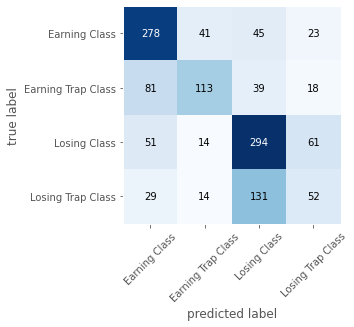

In [118]:
fig, ax = plot_confusion_matrix(
    conf_mat=cmat,
    class_names=class_dict.values(),
)

In [132]:
print(classification_report(np.array(list(y_test)), list(predicted_values1_CNN_DBEMA), digits=4))

              precision    recall  f1-score   support

           0     0.5698    0.8147    0.6706       421
           1     0.5745    0.3432    0.4297       236
           2     0.5455    0.7059    0.6154       391
           3     0.3143    0.0466    0.0812       236

    accuracy                         0.5537      1284
   macro avg     0.5010    0.4776    0.4492      1284
weighted avg     0.5163    0.5537    0.5012      1284



# without DBEMA

In [192]:
cmat_2 = confusion_matrix(np.array(list(y_test)),list(predicted_values1_CNN_DBEMA))

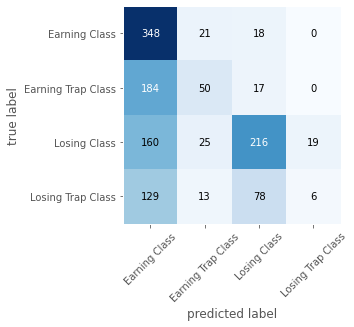

In [194]:
fig, ax = plot_confusion_matrix(
    conf_mat=cmat_2,
    class_names=class_dict.values(),
)

In [153]:
print(classification_report(np.array(list(y_test)), list(predicted_values1_CNN_DBEMA), digits=4))

              precision    recall  f1-score   support

           0     0.5209    0.7416    0.6119       387
           1     0.4693    0.4440    0.4563       241
           2     0.6294    0.5360    0.5789       431
           3     0.3406    0.2089    0.2590       225

    accuracy                         0.5234      1284
   macro avg     0.4900    0.4826    0.4765      1284
weighted avg     0.5160    0.5234    0.5098      1284



In [154]:
accuracy,Precision, Sensitivity, Specificity, f1_score = confusion_matrix_returns(list(y_test), list(predicted_values1_CNN_DBEMA))

Accuracy:  0.7616822429906541
Precision:  0.49004422301254363
Sensitivity:  0.48260930889803505
Specificity:  0.8360766776277387
F1_Score:  0.48629834990266807


In [620]:
predicted_values1_CNN_DBEMA = model.predict_classes(x= testImages)

In [621]:
predicted_values1_CNN_DBEMA

array([2, 3, 0, ..., 2, 3, 2], dtype=int64)

sensitivity_tam :  0.8437196996455341
specificity_tam :  0.5014792007483226
precision_tam :  0.8299158831556263
accuracy_tam :  [0.00085077 0.00255231]
---------------
1284
1284


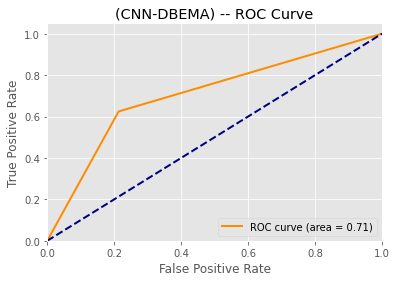

---------------
0.7183842588956091
0.6128549323017408
0.7056354210050122
0.5349542551700667
---------------


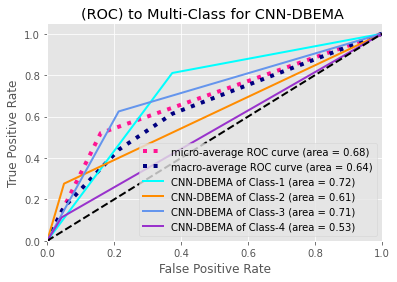

---------------
CNN-DBEMA for One-vs-One ROC AUC scores:
0.642957 (macro),
0.659832 (weighted by prevalence)
CNN-DBEMA for One-vs-Rest ROC AUC scores:
0.642957 (macro),
0.659832 (weighted by prevalence)


In [499]:
predicted_values1_CNN_DBEMA = model.predict_classes(x= testImages)

### Converting predicted values into classes using new threshold
threshold=0.3

predicted_class1=np.zeros(predicted_values1_CNN_DBEMA.shape)
predicted_class1[predicted_values1_CNN_DBEMA < 1+threshold ]=0
predicted_class1[(1+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <2+threshold) ]=1
predicted_class1[(2+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <3)  ] = 2
predicted_class1[predicted_values1_CNN_DBEMA > 3 ]=3
predicted_class1
predicted_class1 = predicted_values1_CNN_DBEMA

#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm_tam = multilabel_confusion_matrix(y_test , predicted_class1)

n_classes = 4

'''
total=0
sensitivity_tam = 0
specificity_tam = 0
'''

total=0
sensitivity_tam = 0
specificity_tam = 0
precision_tam = 0
accuracy_tam = 0
total1= 0


for i in range(0,n_classes):
    cm1 = cm_tam[i] 
    total = sum(cm1)
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[1,0])
    specificity = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    
    ###################################
    #specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    accuracy = cm1[0,0]/(cm1[0,0]+ cm1[1,1] )
    
    ###################################
    
    sensitivity_tam = sensitivity_tam + sensitivity
    specificity_tam = specificity_tam + specificity
    
    ###################################
    precision_tam = precision_tam + precision
    accuracy_tam = accuracy_tam + accuracy
    total1 =  total1 + total

    
    
sensitivity_tam =  sensitivity_tam / n_classes
 
specificity_tam =  specificity_tam / n_classes

precision_tam = precision_tam / n_classes

accuracy_tam = accuracy_tam / total1

#f1_score_sonuc = f1_score(y_test,predicted_class1, average='macro')



print('sensitivity_tam : ', sensitivity_tam )
print('specificity_tam : ', specificity_tam )
print('precision_tam : ', precision_tam )
print('accuracy_tam : ', accuracy_tam )
#print('f1_score_sonuc : ', f1_score_sonuc )



######################  Burası kapatıldı

'''
for i in range(0,n_classes):
    cm1 = cm_tam[i]    
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    sensitivity_tam = sensitivity_tam + sensitivity
    specificity_tam = specificity_tam + specificity
    
    
sensitivity_tam =  sensitivity_tam / n_classes
 
specificity_tam =  specificity_tam / n_classes

print('sensitivity_tam : ', sensitivity_tam )
print('specificity_tam : ', specificity_tam )
'''


######################  Burası kapatıldı sonnnnn



'''
cm1 = confusion_matrix(y_test,predicted_values1_cart)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))

#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


print('total1 : ', total1)
print('TP : ', cm1[0,0])
print('FP : ', cm1[0,1])
print('FN : ', cm1[1,0])
print('TN : ', cm1[1,1])
'''

#*******************************************************

print("---------------")

y_pred_varibale = predicted_class1
y_pred_varibale = np.array(y_pred_varibale)
#y_test_variable = y_pred.to_numpy()
y_test_variable = np.array(y_test)
print(y_test_variable.size)
print(y_pred_varibale.size)
y_binarize_test = label_binarize(y_test_variable, classes=[0, 1, 2, 3]) 
y_binarize_pred = label_binarize(y_pred_varibale, classes=[0, 1, 2, 3]) 


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarize_test[:, i], y_binarize_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_binarize_test.ravel(), y_binarize_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(CNN-DBEMA) -- ROC Curve')
plt.legend(loc="lower right")
plt.show()

#*************************************************


print("---------------")

Class_1 = roc_auc_score(y_binarize_test[:,0], y_binarize_pred[:,0])
Class_2 = roc_auc_score(y_binarize_test[:,1], y_binarize_pred[:,1])
Class_3 = roc_auc_score(y_binarize_test[:,2], y_binarize_pred[:,2])
Class_4 = roc_auc_score(y_binarize_test[:,3], y_binarize_pred[:,3])
print(Class_1)
print(Class_2)
print(Class_3)
print(Class_4)

print("---------------")

#****************************************************


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

classes = cycle(['Class-1', 'Class-2', 'Class-3', 'Class-4'])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkorchid'])
for i, color ,clas in zip(range(n_classes), colors, classes):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='CNN-DBEMA of {0} (area = {1:0.2f})'
             ''.format(clas , roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) to Multi-Class for CNN-DBEMA ')
plt.legend(loc="lower right")
plt.show()

#*************************************************


print("---------------")


macro_roc_auc_ovo = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_binarize_test, y_binarize_pred, multi_class="ovr",
                                     average="weighted")
print("CNN-DBEMA for One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("CNN-DBEMA for One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

# confusion_matrix_returns function

In [180]:
def confusion_matrix_returns(y_test_f,predicted_class1_f):
    cm_tam_yeni = confusion_matrix(list(y_test_f), list(predicted_class1_f)).ravel()
    cm_tam_yeni_len =len(cm_tam_yeni)
    root= int(pow(cm_tam_yeni_len, 0.5))
    confusion_matrix_m = cm_tam_yeni.reshape(root,root)
    FP = confusion_matrix_m.sum(axis=0) - np.diag(confusion_matrix_m)  
    FN = confusion_matrix_m.sum(axis=1) - np.diag(confusion_matrix_m)
    TP = np.diag(confusion_matrix_m)
    TN = confusion_matrix_m.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)


    f1_score =(2*(PPV * TPR))/(PPV + TPR)


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    accuracy = ACC.mean()
    Precision = PPV.mean()
    Sensitivity = TPR.mean()
    Specificity = TNR.mean()
    f1_score =(2*(Precision * Sensitivity))/(Precision + Sensitivity)
    
    print("Accuracy: " , accuracy)
    print("Precision: " , PPV.mean())
    print("Sensitivity: " , TPR.mean())
    print("Specificity: " , TNR.mean())
    print("F1_Score: " , f1_score.mean())
    return accuracy,Precision, Sensitivity, Specificity, f1_score

In [134]:
predicted_values1_CNN_DBEMA = model.predict_classes(x= testImages)

### Converting predicted values into classes using new threshold
threshold=0.4

predicted_class1=np.zeros(predicted_values1_CNN_DBEMA.shape)
predicted_class1[predicted_values1_CNN_DBEMA < 1+threshold ]=0
predicted_class1[(1+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <2+threshold) ]=1
predicted_class1[(2+threshold < predicted_values1_CNN_DBEMA ) &  ( predicted_values1_CNN_DBEMA <3+threshold)  ] = 2
predicted_class1[predicted_values1_CNN_DBEMA > 3+threshold ]=3
#predicted_class1 
predicted_class1  = predicted_values1_CNN_DBEMA

In [135]:
accuracy,Precision, Sensitivity, Specificity, f1_score = confusion_matrix_returns(y_test,predicted_class1)

Accuracy:  0.7768691588785046
Precision:  0.500993946676777
Sensitivity:  0.477609925567715
Specificity:  0.8405431656989033
F1_Score:  0.48902255216580665


In [55]:
print(classification_report(y_test, predicted_class1, digits=4))

              precision    recall  f1-score   support

           0     0.5239    0.7737    0.6248       411
           1     0.2988    0.2168    0.2513       226
           2     0.5102    0.3686    0.4280       407
           3     0.2648    0.2417    0.2527       240

    accuracy                         0.4478      1284
   macro avg     0.3994    0.4002    0.3892      1284
weighted avg     0.4315    0.4478    0.4271      1284



In [183]:
accuracy_score(y_test,predicted_class1)

0.5661993769470405

In [61]:
print(classification_report(list(y_test), list(predicted_class1)))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67       387
           1       0.62      0.32      0.42       251
           2       0.60      0.74      0.66       420
           3       0.36      0.15      0.21       226

    accuracy                           0.57      1284
   macro avg       0.54      0.50      0.49      1284
weighted avg       0.55      0.57      0.54      1284



In [184]:
print(classification_report(list(y_test), list(predicted_class1)))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       387
           1       0.53      0.56      0.55       251
           2       0.57      0.76      0.65       420
           3       0.30      0.14      0.19       226

    accuracy                           0.57      1284
   macro avg       0.52      0.52      0.51      1284
weighted avg       0.54      0.57      0.54      1284



In [185]:
n_classes = 4

cm_tam_yeni = confusion_matrix(list(y_test), list(predicted_class1)).ravel()
cm_tam_yeni_len =len(cm_tam_yeni)
root= int(pow(cm_tam_yeni_len, 0.5))
cm = cm_tam_yeni.reshape(root,root)


# np.set_printoptions(suppress=True, precision=4)


for c in range(n_classes):
    tp = cm[c,c]
    fp = sum(cm[:,c]) - cm[c,c]
    fn = sum(cm[c,:]) - cm[c,c]
    tn = sum(np.delete(sum(cm)-cm[c,:],c))

    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    specificity = tn/(tn+fp)
    f1_score = 2*((precision*recall)/(precision+recall))
    

    #print(f"for class {c}: acc {accuracy}, recall {recall},\
    #      precision {precision}, f1 {f1_score}")
    print("for class {}: recall {},  specificity {}\
          precision {}, f1 {}".format(c,round(recall,4), round(specificity,4), round(precision,4),round(f1_score,4)))

##    print("tp: ", tp)
##    print("fp: ", fp)
##    print("fn: ", fn)
##    print("tn: ", tn)

for class 0: recall 0.6098,  specificity 0.8707          precision 0.6705, f1 0.6387
for class 1: recall 0.5618,  specificity 0.879          precision 0.5301, f1 0.5455
for class 2: recall 0.7595,  specificity 0.7164          precision 0.5656, f1 0.6484
for class 3: recall 0.1372,  specificity 0.9329          precision 0.3039, f1 0.189


In [194]:
confusion_matrix(list(y_test),list(predicted_class1))

array([[236,  78,  56,  17],
       [ 53, 141,  43,  14],
       [ 32,  29, 319,  40],
       [ 31,  18, 146,  31]], dtype=int64)

In [195]:
print(classification_report(list(y_test), list(predicted_class1)))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       387
           1       0.53      0.56      0.55       251
           2       0.57      0.76      0.65       420
           3       0.30      0.14      0.19       226

    accuracy                           0.57      1284
   macro avg       0.52      0.52      0.51      1284
weighted avg       0.54      0.57      0.54      1284

